# Projet MLOps – Modélisation

Entraînement et comparaison de modèles de classification.

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import joblib

In [35]:
df = pd.read_csv("C:/Users/adamt/Downloads/data_modeling.csv")
X = df.drop(columns=["income"])
y = df["income"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [37]:
preprocess = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), X.columns)
])

In [38]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=2000, class_weight="balanced"),
    "RandomForest": RandomForestClassifier(n_estimators=300, class_weight="balanced"),
    "BernoulliNB": BernoulliNB()
}

In [39]:
results = {}
for name, model in models.items():
    pipe = Pipeline([("prep", preprocess), ("model", model)])
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_validate(pipe, X_train, y_train, cv=cv, scoring="f1_macro")
    results[name] = scores["test_score"].mean()

results

{'LogisticRegression': np.float64(0.7561700139082398),
 'RandomForest': np.float64(0.7487197562388614),
 'BernoulliNB': np.float64(0.7733462196518057)}

In [40]:
best_model_name = max(results, key=results.get)
best_model_name

'BernoulliNB'

In [41]:
best_pipe = Pipeline([
    ("prep", preprocess),
    ("model", models[best_model_name])
])
best_pipe.fit(X_train, y_train)

,steps,"[('prep', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [42]:
y_pred = best_pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.90      0.87      0.88      7431
        >50K       0.63      0.70      0.66      2338

    accuracy                           0.83      9769
   macro avg       0.76      0.78      0.77      9769
weighted avg       0.83      0.83      0.83      9769



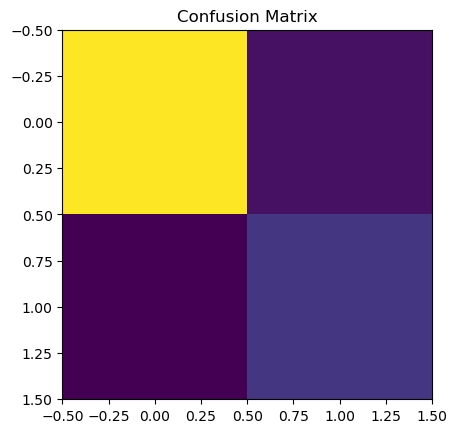

In [43]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.show()

In [45]:
joblib.dump(best_pipe, "C:/Users/adamt/Downloads/best_model.joblib")


['C:/Users/adamt/Downloads/best_model.joblib']